In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
import pymysql
timeout = 10
connection = pymysql.connect(
      charset="utf8mb4",
      connect_timeout=timeout,
      cursorclass=pymysql.cursors.DictCursor,
      db="WEATHER-AIR-POLLUTION",
      host="mysql-3cafd5ec-weather-air-pollution.e.aivencloud.com",
      password="************************************",
      read_timeout=timeout,
      port=24379,
      user="avnadmin",
      write_timeout=timeout
)
cur = connection.cursor()
cur.execute("""SELECT * FROM Weather_Air_Cleaned""")
df = pd.DataFrame(cur.fetchall())
df["date_time"] = pd.to_datetime(df["date_time"])
cur.close()
connection.close()
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0


## VISUALIZATION: SO2


### Season division 

In [18]:

df.describe(exclude=["datetime64"])
df['date_time']=pd.to_datetime(df['date_time'])
df["year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month
df["day"] = df["date_time"].dt.day
def get_season(val):
    season = {12: "Winter", 1: "Winter", 2: "Winter", 
              3: "Spring", 4: "Spring", 5: "Spring", 
              6: "Summer", 7: "Summer", 8: "Summer", 
              9: "Autumn", 10: "Autumn", 11: "Autumn"}
    return season.get(val)
df["season"] = df["month"].map(get_season)
df
df["weekday_name"] = df["date_time"].dt.day_name()

### Summary statistics

In [10]:
df.describe()

,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,7.433079,9.166030,25.028704,9.223542,29.823044,80.009838,36.372704,20.649026,51.346262,10.600116,13.186921,3.219956
std,24.328345,1.246316,4.647078,3.707362,0.187886,10.125982,27.204867,16.506355,88.280234,5.074927,8.286860,2.348592
min,0.000000,1.000000,11.200000,2.390000,29.410000,36.000000,0.874000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,0.000000,8.700000,21.500000,6.690000,29.660000,73.000000,17.000000,11.000000,19.000000,10.000000,8.000000,2.000000
50%,0.735000,9.800000,25.600000,8.180000,29.800000,83.000000,28.000000,17.000000,26.000000,11.000000,13.000000,3.000000
75%,5.025000,10.000000,28.800000,10.762500,29.970000,88.000000,46.000000,27.000000,39.000000,15.000000,13.000000,4.000000
max,506.710000,10.000000,35.400000,32.930000,30.350000,97.000000,272.688000,391.552000,500.000000,23.000000,48.000000,29.000000


### SO2 distribution all time

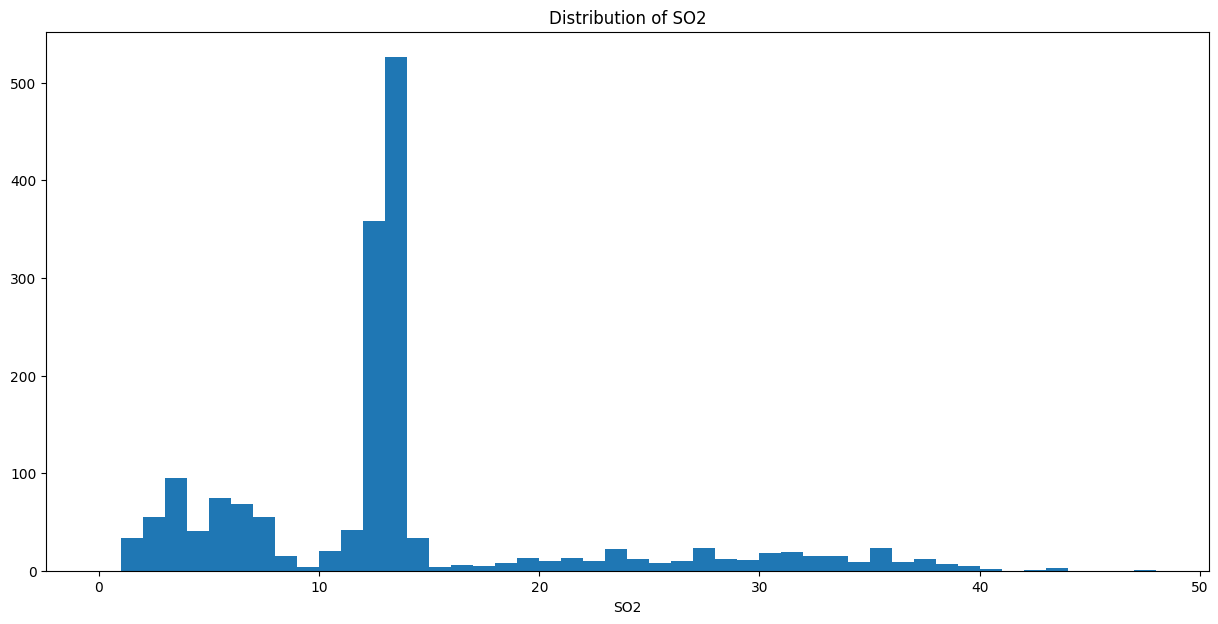

In [67]:
# x = [0,5,10,15,20,25,30,35,40,45,50]
plt.figure(figsize = (15, 7))
bins = np.arange(0, df['so2'].max()+1, 1)
plt.hist(data = df, x = 'so2', bins = bins)
# plt.xticks(x)
plt.title('Distribution of SO2')
plt.xlabel('SO2')



plt.show();

    _Overall Shape: Right-skewed, with most data concentrated in a small range.

    _The highest frequency occurs between 10–15.

    _all are in the range 0-50 (safe zone)

### SO2 distribution over seasons

<Figure size 1500x700 with 0 Axes>

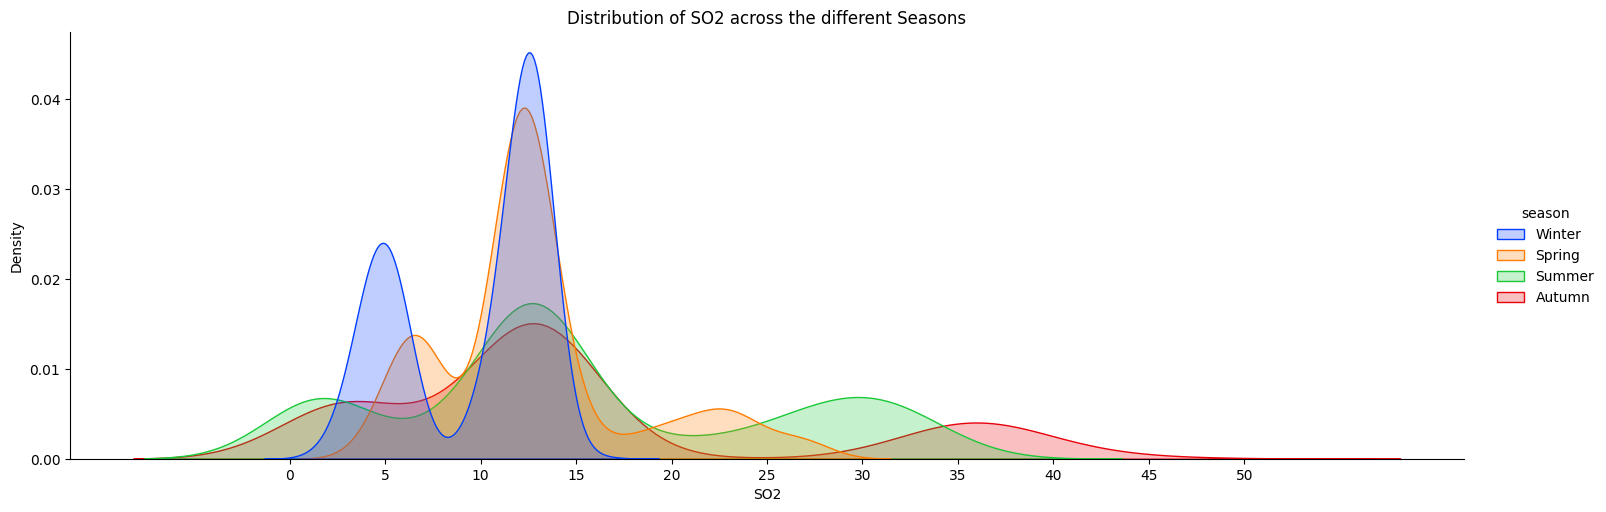

In [29]:
# to observe the distribution of PM2.5 per season
x = [0,5,10,15,20,25,30,35,40,45,50]
plt.figure(figsize = (15, 7))
sns.displot(data = df, x = 'so2', hue = 'season', kind = 'kde', fill = True,
           palette = sns.color_palette('bright')[:4], height =5, aspect = 3)
plt.xticks(x)
plt.title('Distribution of SO2 across the different Seasons')
plt.xlabel('SO2')
plt.show();

    All Seasons (Winter, Spring, Summer, and Autumn) have their highest SO2 concentrations around the 10–15 range.

    Winter has the highest SO2 levels, while Spring and Summer have lower peaks around the same range.

    Autumn also peaks at 10–15 but with a broader spread, showing more variability in SO2 levels.

    In summary, 10–15 is the common high concentration range across all seasons, with Winter having the most pronounced peak and Autumn showing more variation.

### SO2 changes overtime

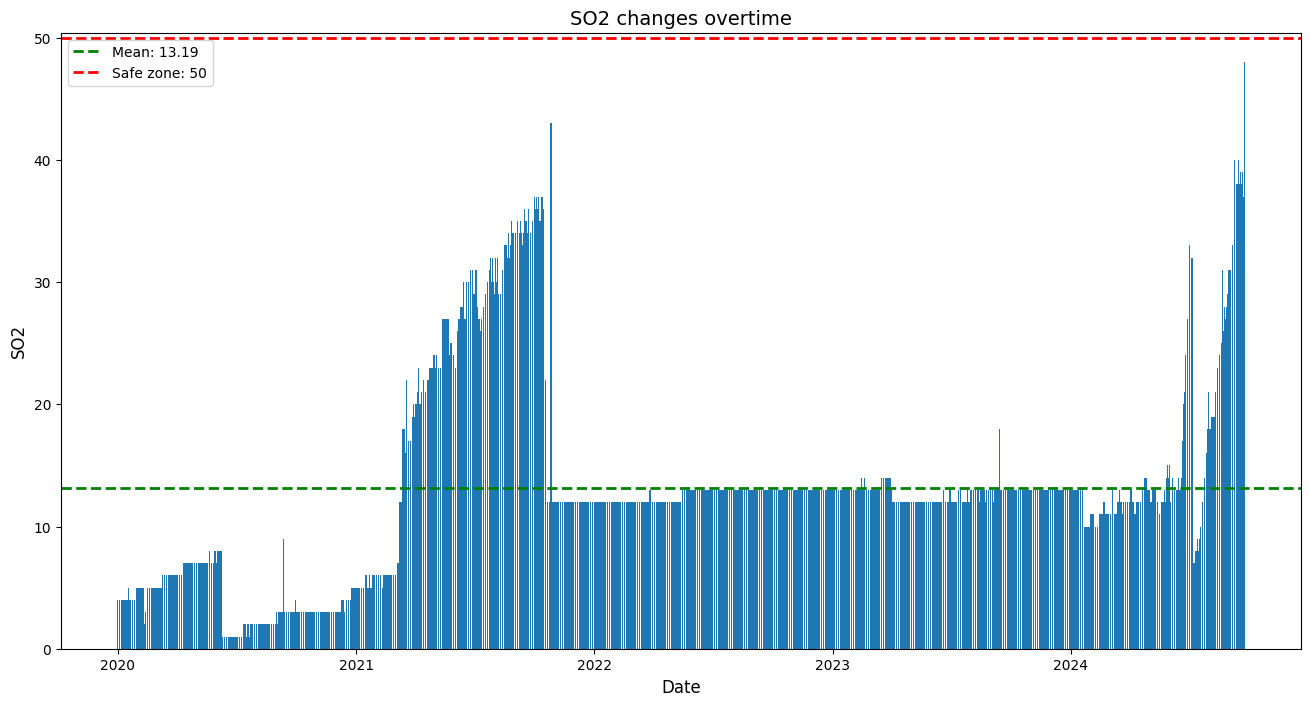

Percentage of days exceed mean: 19.68%


In [16]:

date = df.groupby('date_time')['so2'].mean().sort_index()
mean_value=date.mean()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
plt.bar(pd.to_datetime(df['date_time']),df['so2'])

plt.xlabel('Date', fontsize = 12)
plt.ylabel('SO2', fontsize = 12)
plt.title('SO2 changes overtime', fontsize = 14)
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axhline(50, color='red', linestyle='--', linewidth=2, label=f'Safe zone: 50')
plt.legend()
plt.show()
df_filtered = df[df['so2'] > date.mean()].count()
df_filtered
percent=df_filtered['so2']/df.count()['so2']*100
print(f'Percentage of days exceed mean: {round(percent,2)}%')

    The amount of SO2 in 2020 was very low and began to increase suddenly until near the beginning of 2022, when it suddenly decreased (possibly due to the pandemic), then stabilized until 2024, when there was a strong increase.

    Only 19.68% of days recorded SO2 levels above the mean, highlighting that instances of elevated SO2 are infrequent and the majority of days stay well within average levels.

    They are all stay in the safe zone(0-50)

### SO2 changes over years

year
2020     3.994536
2021    20.887671
2022    12.657534
2023    12.758904
2024    16.569288
Name: so2, dtype: float64


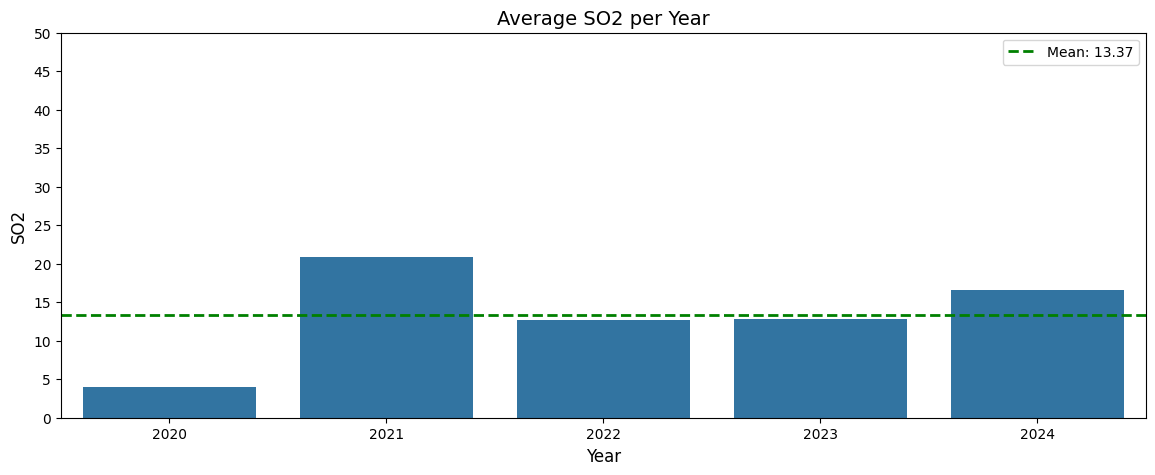

In [31]:
year = df.groupby('year')['so2'].mean().sort_index()
print(year)

y = [0,5,10,15,20,25,30,35,40,45,50]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [14, 5])
sns.barplot(x = year.index, y = year)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('SO2', fontsize = 12)
plt.title('Average SO2 per Year', fontsize = 14)
plt.yticks(y)
mean_value = year.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    2021 and 2024 have average SO₂ levels above the overall mean of 13.37, with 2021 being the highest. In contrast, 2020 and 2023 fall below the mean, particularly 2020, which has a extremely low SO₂ level.

    Only 2021 and 2024 exceed the overall mean, indicating inconsistent SO₂ levels across the years.

### SO2 changes over months

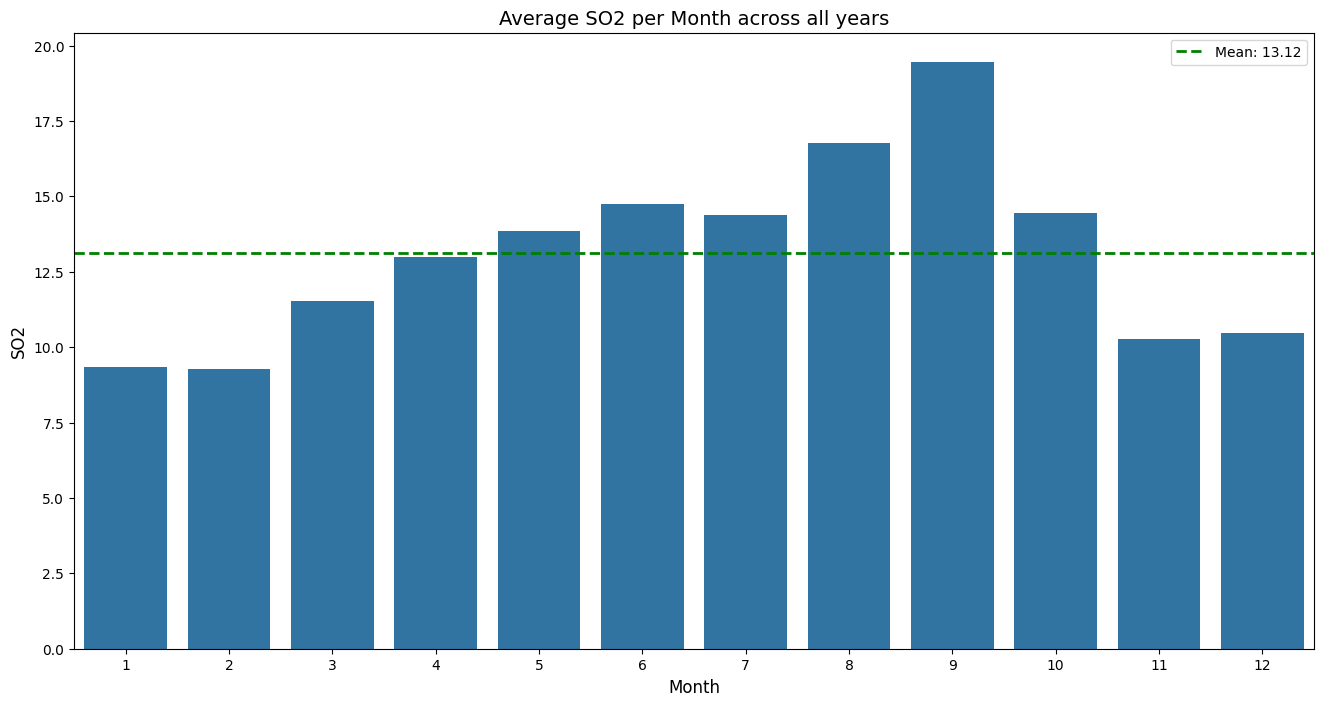

In [19]:
date = df.groupby('month')['so2'].mean()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = date.index, y = date)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('SO2', fontsize = 12)
plt.title('Average SO2 per Month across all years', fontsize = 14)
mean_value = date.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Monthly Variation: Average SO₂ tends to be increase from March to October, with September reaching the peak, significantly exceeding the overall mean (13.12). January, February, November, and December show lower average SO₂ levels below the mean.

    The months with higher SO₂ levels mostly fall in spring, summer, and early autumn, while winter months have lower levels.

    The mean line (13.12) clearly indicates which months have SO₂ levels above or below the overall average, highlighting seasonal differences in air quality.



### SO2 changes over seasons

season
Autumn    14.994832
Spring    12.782609
Summer    15.306522
Winter     9.650831
Name: so2, dtype: float64


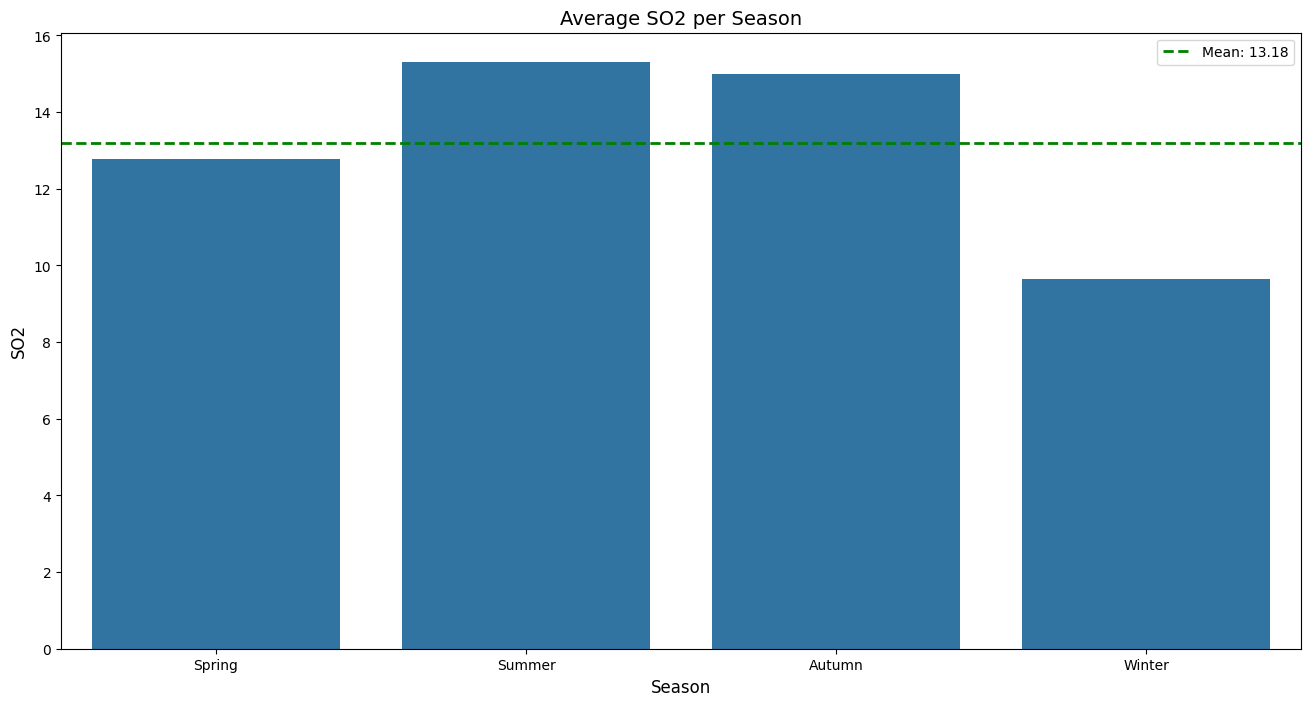

In [20]:
date=df.groupby('season')['so2'].mean()
print(date)
order2 = [ 'Spring', 'Summer', 'Autumn','Winter']
plt.figure(figsize= [16, 8])
sns.barplot(x=date.index, y=date, order=order2)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('SO2', fontsize = 12)
plt.title('Average SO2 per Season', fontsize = 14,)
mean_value = date.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Summer and Autumn have the highest SO₂ levels: Both seasons show average SO₂ levels above the overall mean (13.18), with Autumn reaching the highest levels.

    Winter has the lowest SO₂ levels: Winter exhibits the lowest average SO₂, significantly below the overall mean. This is consistent with previous charts, indicating a drop in SO₂ levels during colder months.

    Spring is near the overall mean: The average SO₂ level in Spring is close to the overall mean, suggesting it as a transitional period for SO₂ levels between seasons.

## Weather factors visualization

### Does total precipitation affect SO2?

#### Average total precipitation per season

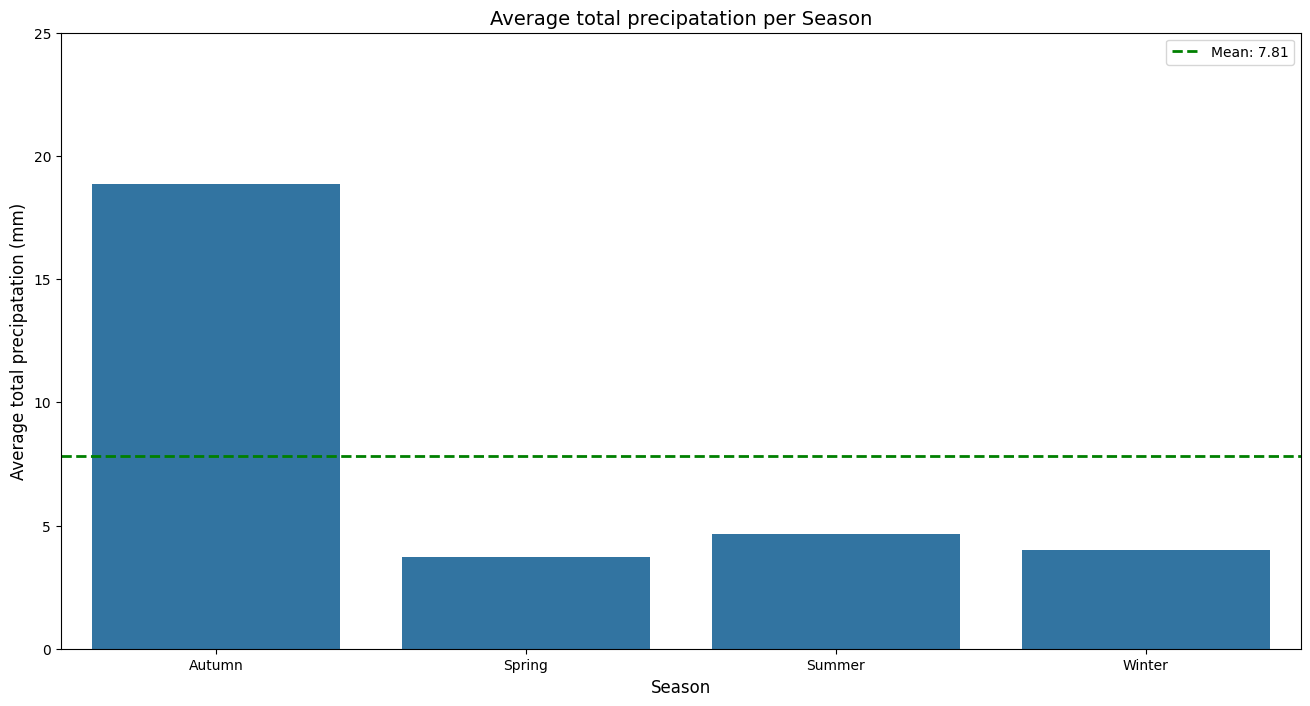

In [21]:
totalprec = df.groupby('season')['totalprecip_mm'].mean().sort_index()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = [ 0, 5, 10, 15, 20, 25]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = totalprec.index, y = totalprec)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average total precipatation (mm)', fontsize = 12)
plt.yticks(x)
plt.title('Average total precipatation per Season', fontsize = 14)
mean_value = totalprec.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Autumn is the wettest season, with precipitation significantly higher than the annual average.

    Spring, Summer, and Winter have relatively similar precipitation levels, all below the annual average.
 

#### Average total precipitation per month

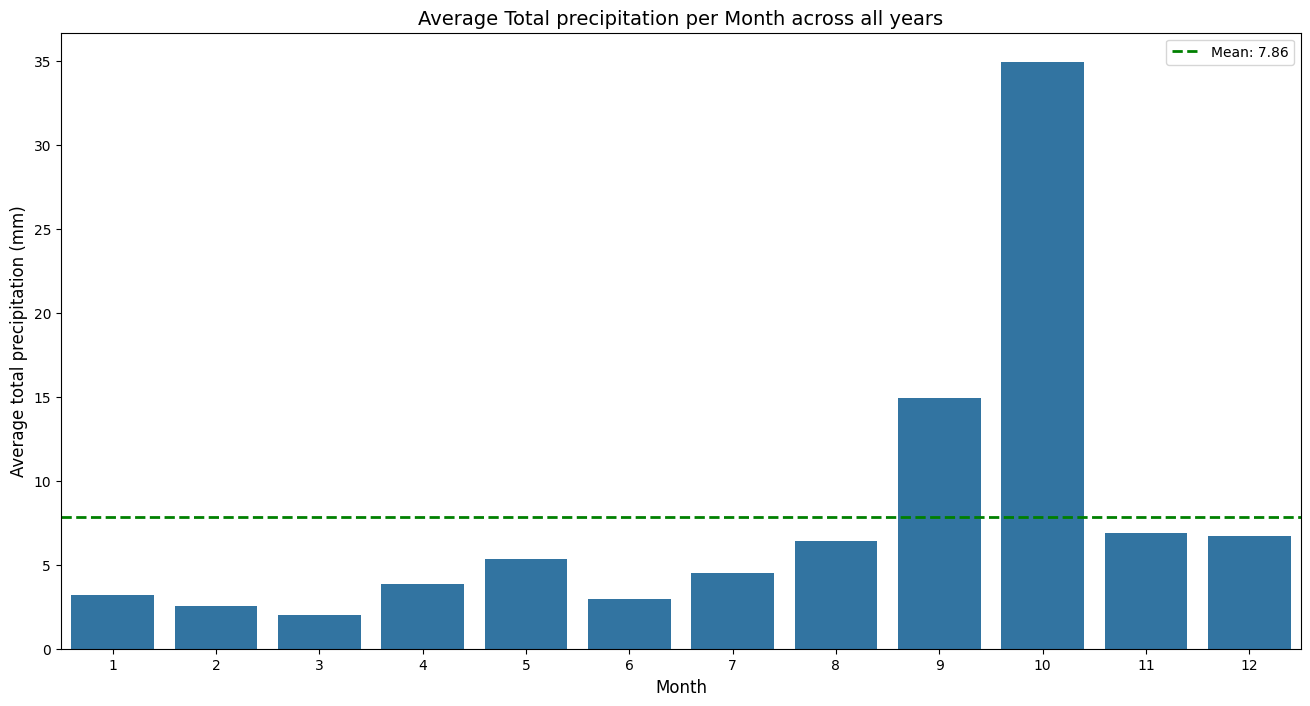

In [22]:
date = df.groupby('month')['totalprecip_mm'].mean()

plt.figure(figsize= [16, 8])
sns.barplot(x = date.index, y = date)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average total precipitation (mm)', fontsize = 12)
plt.title('Average Total precipitation per Month across all years', fontsize = 14)
mean_value = date.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Highest Precipitation: October has the highest average precipitation, significantly above both other months and the overall average. This might indicate that October falls within a rainy season or is affected by specific climate patterns.

    Below-Average Precipitation: Most other months have precipitation levels below the average line, particularly from January to August, as well as November and December. These months exhibit relatively consistent at lower precipitation levels.



### Correlation between SO2 and Total precipitation

Correlation between SO2 and totalprecip_mm is:  0.04


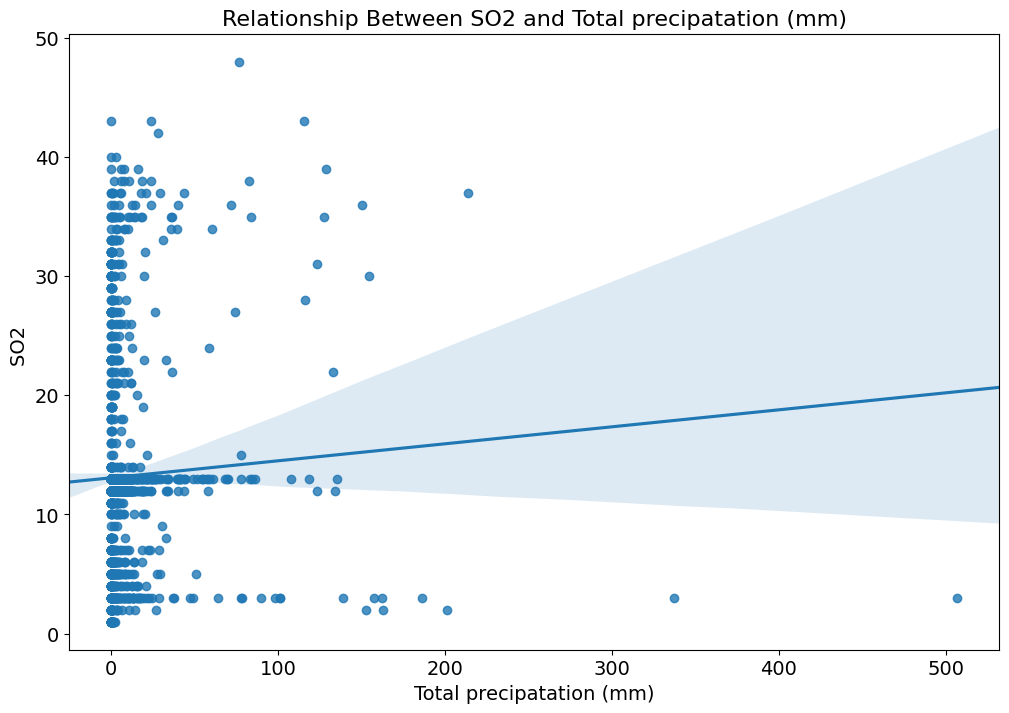

In [36]:
# to print out the correlation between wind speed and PM2.5
corr = df['so2'].corr(df['totalprecip_mm'])
print("Correlation between SO2 and totalprecip_mm is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'totalprecip_mm', y = 'so2', data = df, truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('SO2 ', fontsize = 14)
plt.xlabel("Total precipatation (mm)", fontsize = 14)
plt.title("Relationship Between SO2 and Total precipatation (mm)", fontsize= 16)
plt.show();

    Weak Correlation: There’s a slight upward trend between SO₂ and total precipitation, but it’s not strong due to the scattered data.

    Concentration at Low Precipitation: Most data points are below 100 mm of precipitation, with SO₂ ranging from 0 to about 50.

    High Variability: The large shaded confidence interval around the regression line suggests this relationship is unreliable, likely due to other factors influencing SO₂ levels.

    In summary, precipitation is not a strong predictor of SO₂ levels.

## Does temperature affect SO2?

#### Average temperature per season

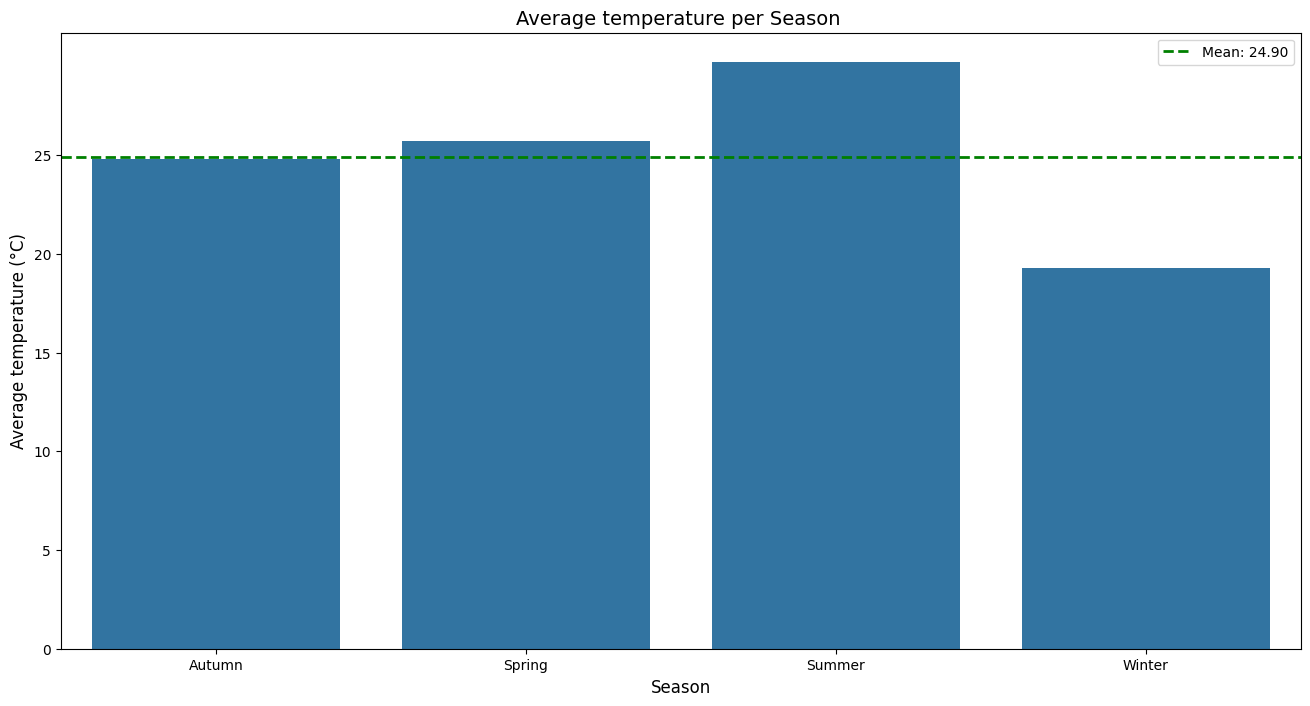

In [23]:
tempc = df.groupby('season')['temp_c'].mean().sort_index()

x = [ 0, 5, 10, 15, 20, 25]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = tempc.index, y = tempc)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average temperature (°C)', fontsize = 12)
plt.yticks(x)
plt.title('Average temperature per Season ', fontsize = 14)
mean_value = tempc.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Highest Temperature: Summer has the highest average temperature, slightly above the overall mean, indicating it’s the warmest season.

    Lowest Temperature: Winter’s average temperature is well below the mean, making it the coldest season.

    Spring and Autumn: Both spring and autumn have average temperatures close to the mean, suggesting relatively mild conditions that are slightly cooler than summer but warmer than winter.

#### Average temperature per month

month
1     18.879355
2     20.161972
3     23.395484
4     25.730000
5     28.105806
6     30.306000
7     29.736129
8     29.139355
9     27.323077
10    23.998387
11    22.721667
12    18.845968
Name: temp_c, dtype: float64


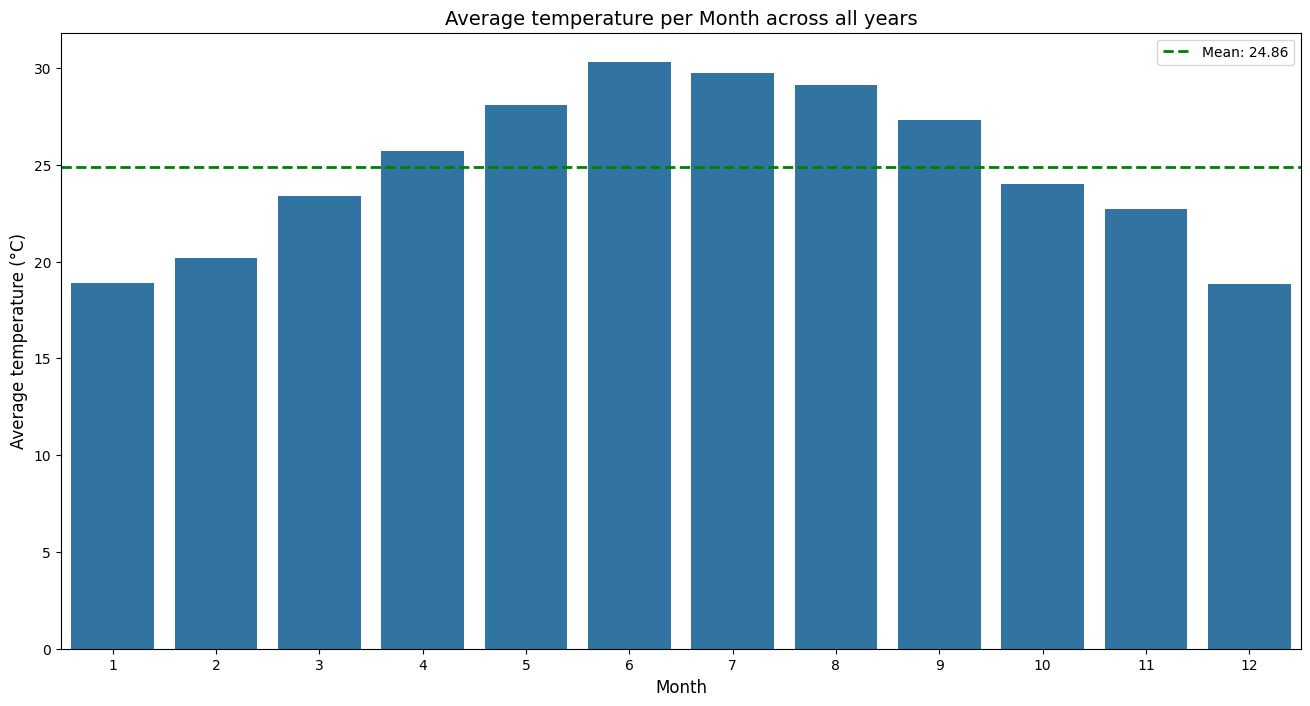

In [24]:
date = df.groupby('month')['temp_c'].mean()
print(date)
plt.figure(figsize= [16, 8])
sns.barplot(x = date.index, y = date)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average temperature (°C)', fontsize = 12)
plt.title('Average temperature per Month across all years', fontsize = 14)
mean_value = date.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Monthly Variation: The temperature generally increases from January (around 20°C) and peaks between June and July (over 25°C). It then decreases gradually towards December.

    Highest and Lowest Months: The highest average temperatures are observed in June and July, while the lowest are in January and September.

    Mean Line: The dashed green line represents the average temperature across all months, approximately 24.86°C. Most summer months (April to September) are above this mean, while the cooler months (October to March) are below it.

### Correlation between SO2 and Temperature

Correlation between so2 and Temperature is:  0.25


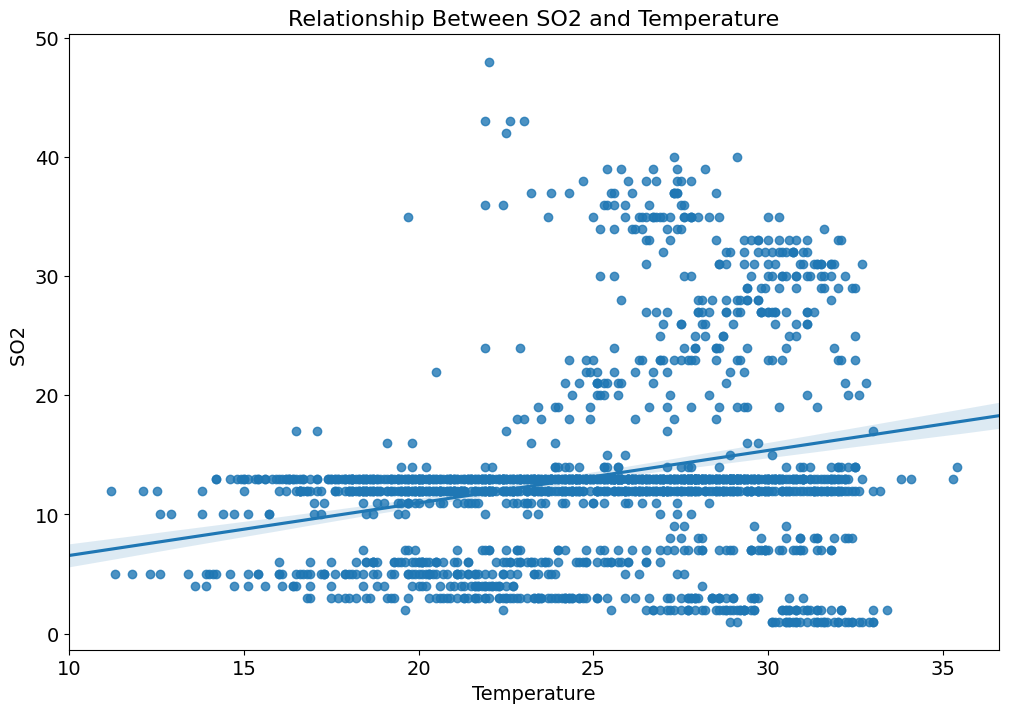

In [39]:
corr = df['so2'].corr(df['temp_c'])
print("Correlation between so2 and Temperature is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'temp_c', y = 'so2', data = df, truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('SO2 ', fontsize = 14)
plt.xlabel("Temperature", fontsize = 14)
plt.title("Relationship Between SO2 and Temperature", fontsize= 16)
plt.show();

    The chart shows that as temperature increases, SO2 levels tend to rise slightly, but the relationship is weak.

    Most points are scattered, especially at higher temperatures. The shaded area around the line shows that predictions are uncertain, meaning the link between temperature and SO2 levels isn't very strong.

## Does wind speed affect SO2?

#### Average wind speed per season


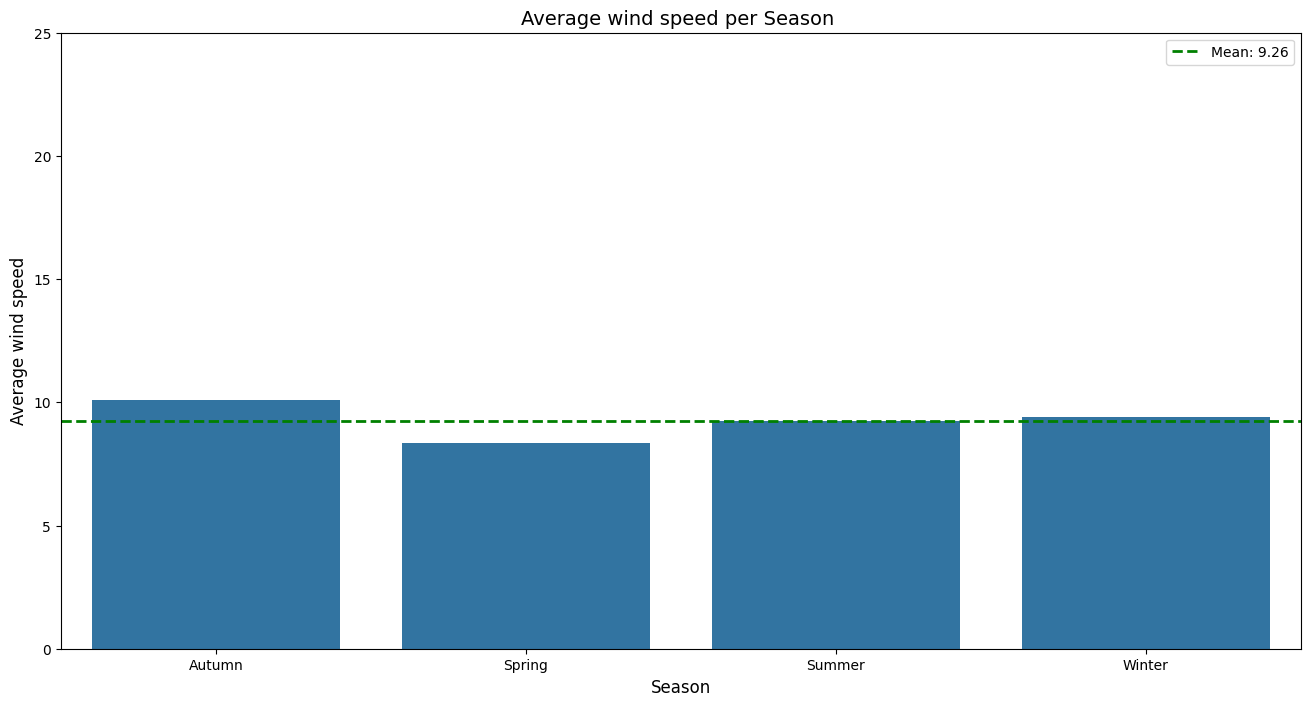

In [25]:
wind = df.groupby('season')['wind_kph'].mean().sort_index()

x = [ 0, 5, 10, 15, 20, 25]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average wind speed', fontsize = 12)
plt.yticks(x)
plt.title('Average wind speed per Season ', fontsize = 14)
mean_value = wind.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()


    Comparison between seasons: Autumn and Winter have similar average wind speeds, both above the mean (9.26 units). Spring has lower average wind speeds, while Summer's wind speed is approximately the same as the mean.

    Mean line: The green dashed line represents the overall average wind speed across all seasons. Autumn and Winter are above this line, while Spring is below it, and Summer is close to the mean.

    Observation: The wind speed in Autumn and Winter is generally higher than in Spring, while Summer's wind speed is almost as high as Winter's.

#### Average wind speed per month

month
1      8.954194
2      8.414014
3      8.045613
4      8.878067
5      8.092065
6      9.696600
7      9.258258
8      8.741290
9      7.968531
10    12.971048
11     9.591333
12    11.122984
Name: wind_kph, dtype: float64


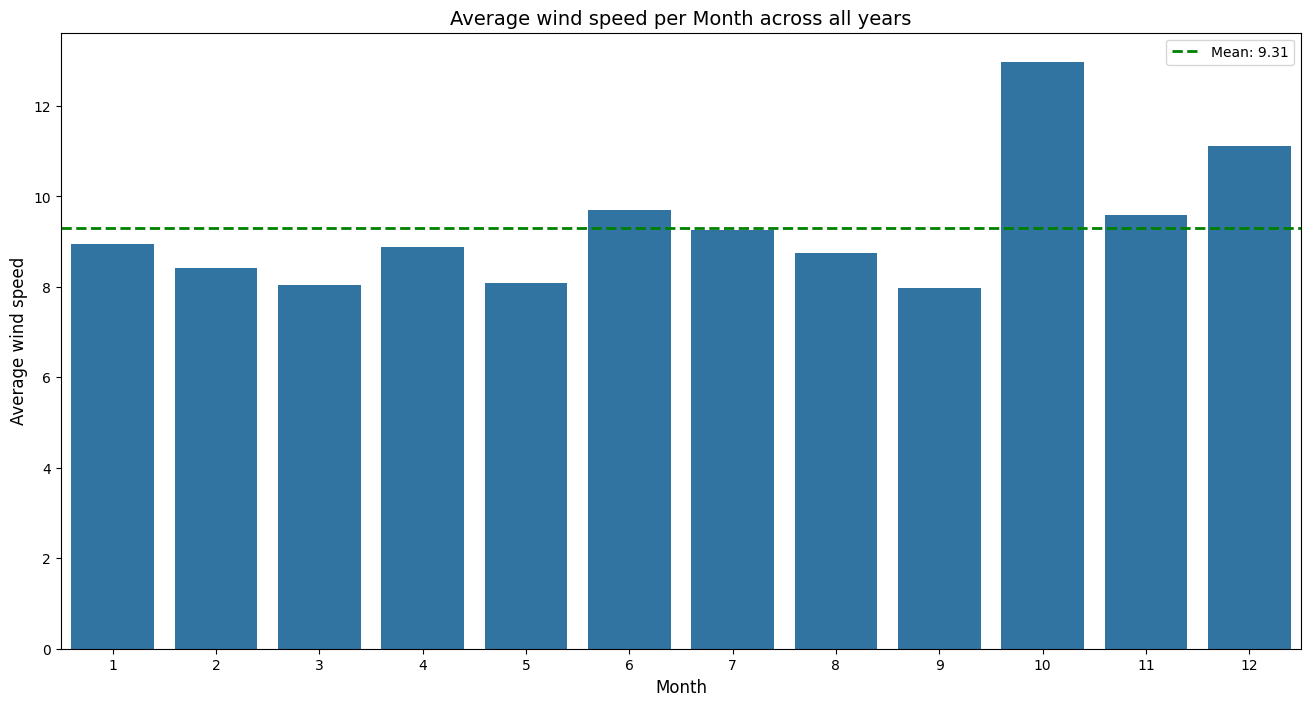

In [26]:

date = df.groupby('month')['wind_kph'].mean()
print(date)
plt.figure(figsize= [16, 8])
sns.barplot(x = date.index, y = date)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average wind speed', fontsize = 12)
plt.title('Average wind speed per Month across all years', fontsize = 14)
mean_value = date.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Consistent Wind Speed: The wind speed remains relatively consistent throughout the year, with minimal fluctuations.

    Peak Wind Speed: October stands out as the month with the highest average wind speed.

    Overall Average: The green horizontal line indicates the annual average wind speed, which is approximately 9.31 units 

### Correlation between SO2 and Wind speed

Correlation between so2 and 'wind_kph' is:  -0.02


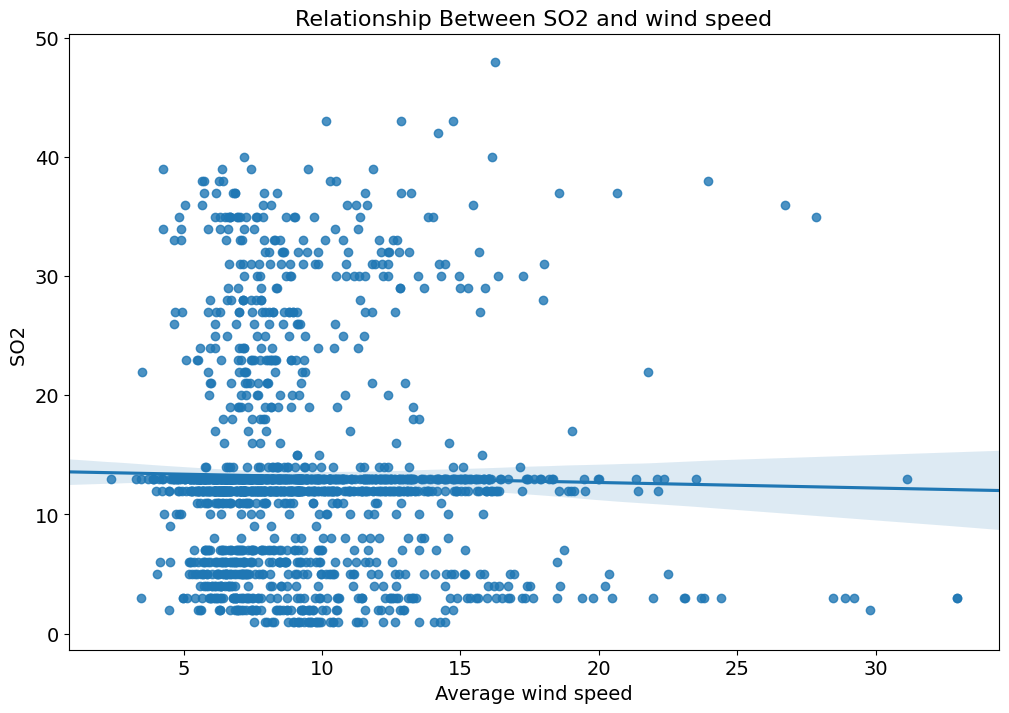

In [42]:
corr = df['so2'].corr(df['wind_kph'])
print("Correlation between so2 and 'wind_kph' is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'wind_kph', y = 'so2', data = df, truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('SO2 ', fontsize = 14)
plt.xlabel("Average wind speed", fontsize = 14)
plt.title("Relationship Between SO2 and wind speed", fontsize= 16)
plt.show();

    Negative correlation: The concentration of SO2 tends to decrease as wind speed increases. However, the relationship is quite weak

    Data dispersion: The data points are widely scattered, indicating that factors other than wind speed also influence SO2 concentration.

    Low wind speed: At low wind speeds, SO2 concentrations can reach high levels and fluctuate significantly.

    High wind speed: As wind speed increases, SO2 concentrations tend to stabilize at lower levels. This suggests that wind plays a significant role in dispersing pollutants like SO2.

## Does humidity affect SO2?

#### Average humidity per season



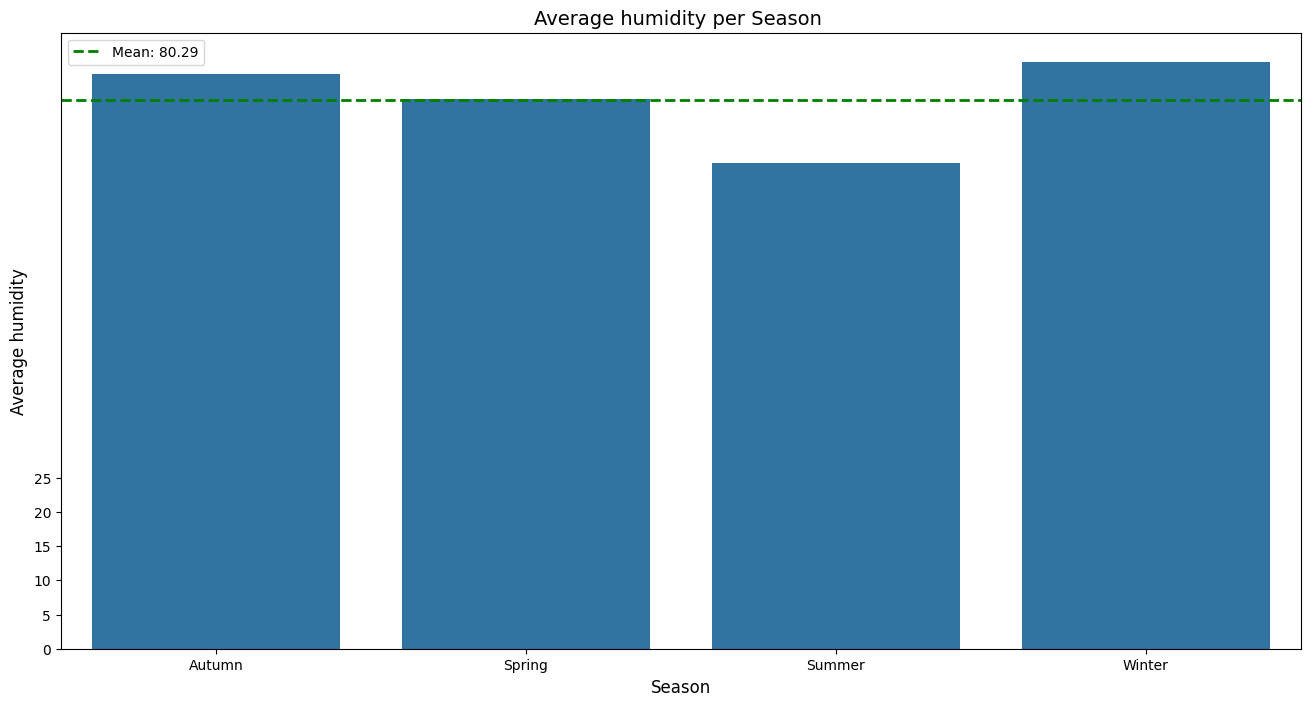

In [43]:
wind = df.groupby('season')['humidity'].mean().sort_index()

x = [ 0, 5, 10, 15, 20, 25]
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average humidity', fontsize = 12)
plt.yticks(x)
plt.title('Average humidity per Season ', fontsize = 14)
mean_value = wind.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

    Average Humidity: All seasons experience relatively high humidity levels, with an overall average of 80.29%.

    Fluctuation: There are significant differences between seasons.

    Winter and Autumn: These two seasons have the highest humidity levels, exceeding the overall average. This indicates that the air is generally more humid during these seasons.

    Summer and Spring: Spring is approximately the same as mean and Summer has the lowest humidity of the year.



#### Average humidity per month

month
1     86.012903
2     86.732394
3     83.522581
4     79.960000
5     77.496774
6     68.006667
7     71.883871
8     72.967742
9     82.076923
10    85.709677
11    84.716667
12    84.459677
Name: humidity, dtype: float64


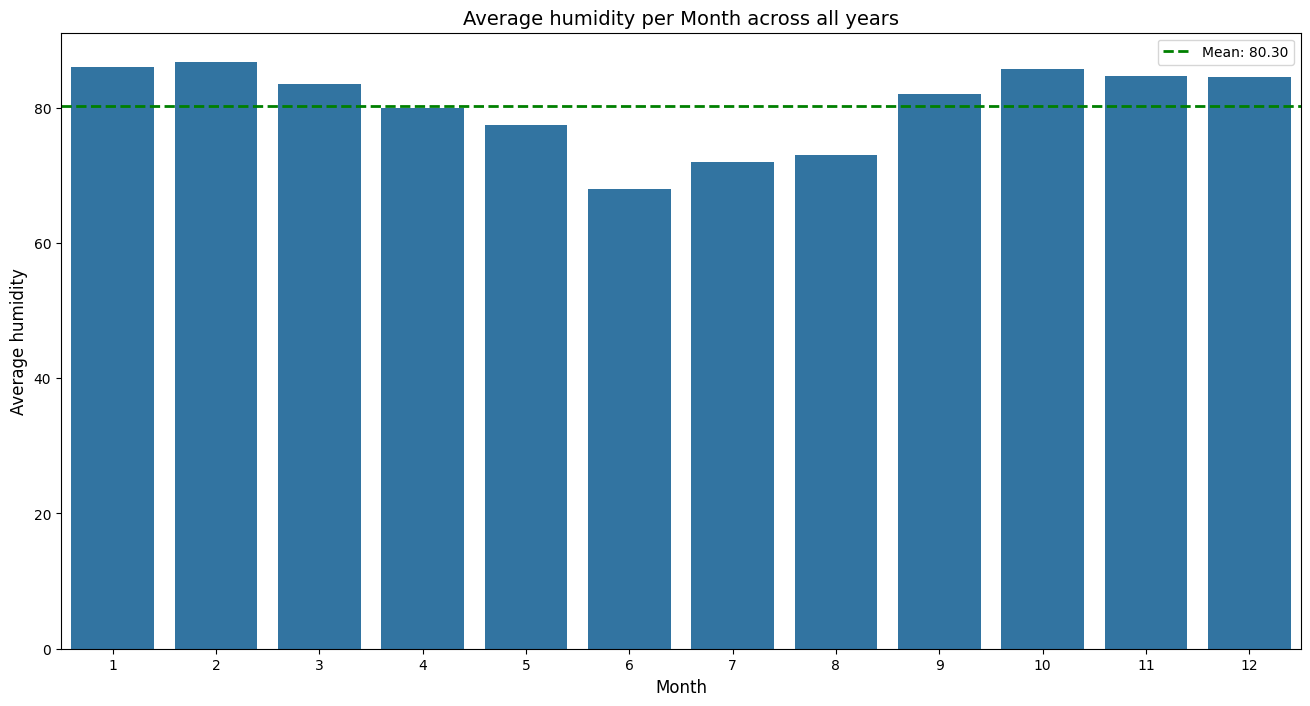

In [44]:
date = df.groupby('month')['humidity'].mean()
print(date)
plt.figure(figsize= [16, 8])
sns.barplot(x = date.index, y = date)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average humidity', fontsize = 12)
plt.title('Average humidity per Month across all years', fontsize = 14)
mean_value = date.mean()
plt.axhline(mean_value, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()


    The average monthly humidity fluctuates around 80%.

    July appears to have the lowest average humidity of the year, while October and November show the highest average humidity.

    The trend indicates a seasonal variation in humidity. Humidity tends to decrease around mid-year, reaching its lowest point in June, and then increases steadily towards the end of the year, peaking in October and November.


Correlation between so2 and 'humidity' is:  -0.12


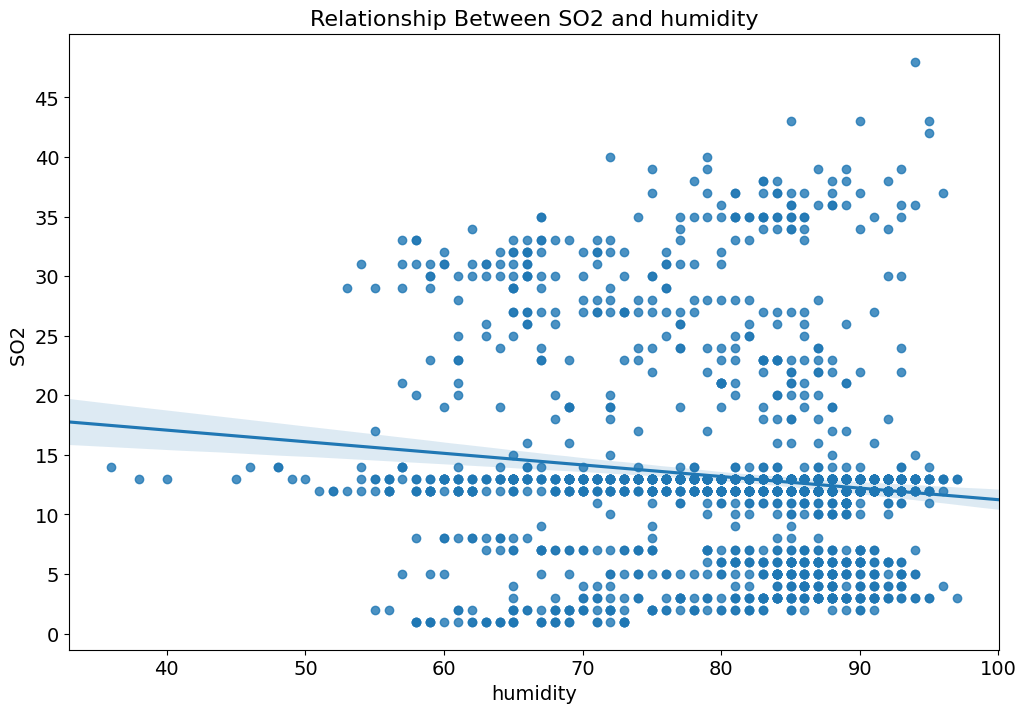

In [45]:
corr = df['so2'].corr(df['humidity'])
print("Correlation between so2 and 'humidity' is: ", round(corr, 2))

y_min, y_max = df['so2'].min(), df['so2'].max()
# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'humidity', y = 'so2', data = df, truncate= False)
plt.yticks(np.arange(0, y_max + 1, 5),fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('SO2 ', fontsize = 14)
plt.xlabel("humidity", fontsize = 14)
plt.title("Relationship Between SO2 and humidity", fontsize= 16)
plt.show();

    As humidity increases, the SO2 levels tend to decrease slightly, but the relationship is not strong.

    There is a wide spread of SO2 values at almost all humidity levels, which indicates significant variability.

    At higher humidity levels (80% and above), there appears to be a larger cluster of lower SO2 values, while lower humidity levels show more spread in SO2 concentrations.

  

## Conclusion



1. Precipitation:

Precipitation is not a strong predictor of SO₂ levels. Most data points are below 100 mm with SO₂ concentrations ranging from 0 to 50. The large confidence interval indicates an unreliable relationship.


2. Temperature

There is a slight upward trend in SO₂ levels with increasing temperature, but the relationship is weak and uncertain due to data dispersion.


3. Wind speed

Wind speed has a weak negative correlation with SO₂ levels. At low wind speeds, SO₂ can be high and fluctuate significantly, while higher wind speeds tend to stabilize SO₂ at lower levels, indicating effective pollutant dispersion.


4. Humidity

SO₂ levels tend to decrease slightly with increasing humidity, but the correlation is weak. Higher humidity (above 80%) shows lower SO₂ values, while lower humidity has more variability.